In [5]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['axes.facecolor']='#E7E8E9'

In [6]:
from scipy.stats import zscore

# https://hongl.tistory.com/100

def modified_z_score(my_data):
    ## First Calculate Median
    median_my_data = np.median(my_data)
    
    ## Median Absolute Deviation 
    ## Median of | X_i - median of X| for all X_i
    mad = np.median(my_data.map(lambda x: np.abs(x - median_my_data)))
    
    ## Modified Z score
    ## 0.6745 * (X_i - median of X)/Median Absolute Deviation
    modified_z_score = list(my_data.map(lambda x: 0.6745* (x - median_my_data)/mad))
    return modified_z_score

---

In [7]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2EnsgID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['EnsemblGeneIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting Ensembl gene IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2EnsgID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2EnsgID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)

In [8]:
Genesets = {
    'OXPHOS complex' : pd.DataFrame({'gene_id' : MitoPW.loc['OXPHOS subunits','EnsemblGeneIDs'].split(',')}),
    'TCA cycle' : pd.DataFrame({'gene_id' : MitoPW.loc['TCA cycle','EnsemblGeneIDs'].split(',')}),
    'Fatty acid oxidation' : pd.DataFrame({'gene_id' : MitoPW.loc['Fatty acid oxidation','EnsemblGeneIDs'].split(',')}),
    'Calcium homeostasis' : pd.DataFrame({'gene_id' : MitoPW.loc['Calcium homeostasis','EnsemblGeneIDs'].split(',')}),
    'All MitoCarta' : MitoCarta[['EnsemblGeneID']].drop_duplicates().rename(columns={'EnsemblGeneID':'gene_id'})
}

----

In [9]:
RD = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD.tsv', sep='\t').drop(columns='gene_name')
RD.iloc[:,1:] = np.log2(RD.iloc[:,1:])

for day in ['0','4','8']:
    RD[f'RD{day}'] = RD[[f'RD{day}{rep}' for rep in ['a','b','c']]].mean(axis=1)

display(RD)

,gene_id,RD0a,RD0b,RD0c,RD4a,RD4b,RD4c,RD8a,RD8b,RD8c,RD0,RD4,RD8
0,ENSMUSG00000033845,0.384560,0.093573,0.176662,-0.286443,0.024544,-0.016629,0.042769,-0.347544,-0.186994,0.218265,-0.092843,-0.163923
1,ENSMUSG00000025903,-4.670646,-4.631477,-4.298782,-4.865560,-4.168386,-4.135296,-5.135595,-4.469899,-4.633928,-4.533635,-4.389747,-4.746474
2,ENSMUSG00000033813,-1.407916,-1.127111,-1.049101,-1.416102,-0.725863,-0.987097,-1.239836,-0.961624,-0.813096,-1.194709,-1.043021,-1.004852
3,ENSMUSG00000033793,1.703974,1.563437,1.458909,1.767617,1.910727,1.857605,1.788015,1.926528,1.863422,1.575440,1.845316,1.859322
4,ENSMUSG00000025907,2.355895,3.285892,2.964592,2.521603,3.628401,2.722776,2.120911,2.662165,2.845057,2.868793,2.957594,2.542711
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11805,ENSMUSG00000064360,-1.190822,-0.264001,1.559481,-1.171672,0.808968,-0.215973,-3.156482,-2.881273,-1.078799,0.034886,-0.192892,-2.372185
11806,ENSMUSG00000064363,-3.459829,-3.415427,-3.128950,-5.300114,-3.597688,-4.175016,-5.224020,-4.328138,-4.403538,-3.334735,-4.357606,-4.651899
11807,ENSMUSG00000064367,-2.007124,-2.000537,-1.978983,-2.636981,-1.802296,-2.803462,-2.833428,-2.371502,-2.489688,-1.995548,-2.414247,-2.564873
11808,ENSMUSG00000064368,-0.916545,-1.255298,-1.037710,-1.818190,-1.401082,-1.817293,-1.631776,-1.140065,-1.393552,-1.069851,-1.678855,-1.388464


In [10]:
RNA = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RNA_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
RPF = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RPF_avg_log2FC.tsv', sep='\t').drop(columns='gene_name')
PT = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_avg_log2FC.tsv', sep='\t')
PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id'))
PT = pd.merge(PT_conv, PT, on='uniprot_id').drop(columns='uniprot_id').sort_values('gene_id').drop_duplicates(subset='gene_id')

RNA = pd.merge(Genesets['All MitoCarta'], RNA, on='gene_id')
RPF = pd.merge(Genesets['All MitoCarta'], RPF, on='gene_id')
PT = pd.merge(Genesets['All MitoCarta'], PT, on='gene_id')

RNA_z = RNA[['gene_id']].copy()
RPF_z = RPF[['gene_id']].copy()
PT_z = PT[['gene_id']].copy()
for col in RNA.iloc[:,1:]:
    RNA_z[col] = modified_z_score(RNA[col])
for col in RPF.iloc[:,1:]:
    RPF_z[col] = modified_z_score(RPF[col])
for col in PT.iloc[:,1:]:
    PT_z[col] = modified_z_score(PT[col])

logFCz = {}
logFCz['R'] = RNA_z
logFCz['P'] = RPF_z
logFCz['PT'] = PT_z

# display(logFCz['R'],logFCz['P'],logFCz['PT'])

In [11]:
def strip_plot(x, y, width, s, c, lw, ax, rasterized):
    ax.scatter(list( x + (np.random.rand(1,len(y))[0] -0.5) * width ), y, 
                s=s, c=c, lw=lw,
                rasterized = rasterized,
                zorder=5)

---

In [12]:
group_mem_n = 3
group_gap = 0.4
x_pos = [i*(group_mem_n+group_gap) + j for i,GS in enumerate(Genesets) for j in range(3)]
box_colors = ['#FFE3E9','#ECC2FF','#FFDBAB','#BBEEFF','#DDDDDD']
sct_colors = ['#F8071DAA','#AA0DB4AA','#D55E00AA','#0066AAAA','#88888888']

plot_data = []
for GS in Genesets:
    tmp = pd.merge(Genesets[GS], RD, on='gene_id')
    for day in ['0','4','8']:
        plot_data.append(list(tmp[f'RD{day}']))
box_color_list = [clr for clr in box_colors for i in range(group_mem_n)]
sct_color_list = [clr for clr in sct_colors for i in range(group_mem_n)]

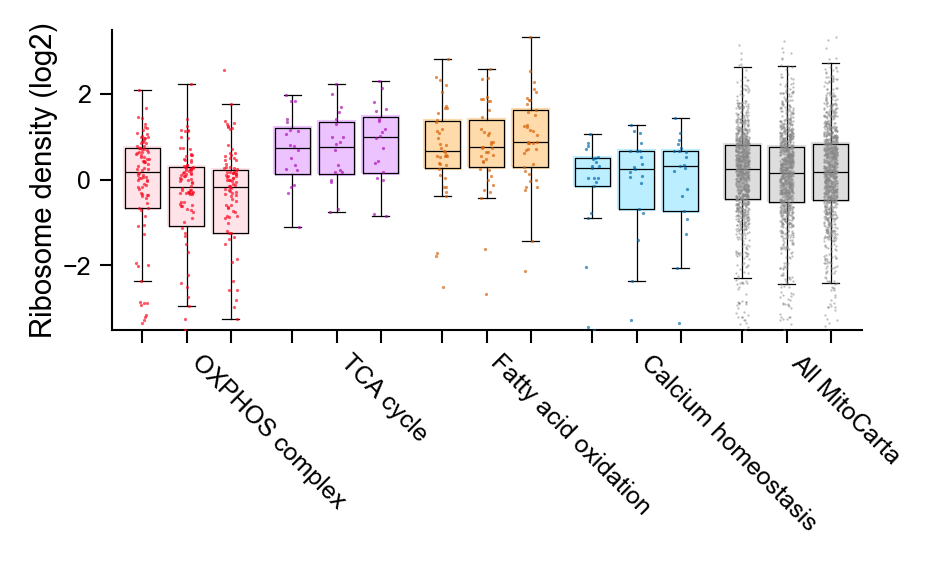

<Figure size 640x480 with 0 Axes>

In [ ]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [1]*nrow
width_ratios = [0.5*len(Genesets)]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


ax = fig.add_subplot(grid[0,0])

box = ax.boxplot(plot_data, positions=x_pos, 
                 widths=0.8,
                 medianprops={'linewidth':0.3, 'color':'k'},
                 boxprops={'linewidth':0.3, 'color':'k'},
                 whiskerprops={'linewidth':0.3, 'color':'k'},
                 capprops={'linewidth':0.3, 'color':'k'},
                 showfliers=False,
                #  showmeans=True, meanprops={'marker':'D', 'markersize':'1.5', 'markerfacecolor':'k', 'markeredgewidth':0}
                 )
for artist, color in zip(box['boxes'], box_color_list):
    patch = mpl.patches.PathPatch(artist.get_path(), color=color)
    ax.add_artist(patch)

for x, values, c in zip(x_pos, plot_data, sct_color_list):
    s = 0.6
    rasterized = False
    if x > 13: 
        s = 0.3
        rasterized = True
    strip_plot(x=x, y=values, 
               width=0.3, s=s, c=c, lw=0, 
               ax=ax, rasterized=rasterized)
    

ax.set_xlim(x_pos[0]-0.7, x_pos[-1]+0.7)
ax.set_ylim(-3.5,3.5) # -3.5,3
ax.set_xticklabels([i for GS in Genesets for i in ['',GS,'']], ha='left', rotation=-45)
ax.tick_params(width=0.5, length=3, pad=2)

ax.set_xlabel('')
ax.set_ylabel('Ribosome density (log2)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('OXPHOS-others_logRD.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [14]:
[len(plot_data[i]) for i in range(len(plot_data))]

[98, 98, 98, 20, 20, 20, 38, 38, 38, 21, 21, 21, 1035, 1035, 1035]

In [15]:
from scipy.stats import ttest_rel

# OXPHOS
print(ttest_rel(plot_data[0], plot_data[1])) # 0 vs 4
print(ttest_rel(plot_data[0], plot_data[2]), '\n') # 0 vs 8

# TCA
print(ttest_rel(plot_data[3], plot_data[4])) # 0 vs 4
print(ttest_rel(plot_data[3], plot_data[5]), '\n') # 0 vs 8

# FA oxidation
print(ttest_rel(plot_data[6], plot_data[7])) # 0 vs 4
print(ttest_rel(plot_data[6], plot_data[8]), '\n') # 0 vs 8

# Calcium
print(ttest_rel(plot_data[9], plot_data[10])) # 0 vs 4
print(ttest_rel(plot_data[9], plot_data[11]), '\n') # 0 vs 8

# All
print(ttest_rel(plot_data[12], plot_data[13])) # 0 vs 4
print(ttest_rel(plot_data[12], plot_data[14]), '\n') # 0 vs 8

Ttest_relResult(statistic=7.368708055841615, pvalue=5.74091642286952e-11)
Ttest_relResult(statistic=7.73587040476316, pvalue=9.729488211907801e-12) 

Ttest_relResult(statistic=0.01699132670210725, pvalue=0.9866206940864846)
Ttest_relResult(statistic=-2.5622212706582492, pvalue=0.01905814480907882) 

Ttest_relResult(statistic=-0.7328476894045357, pvalue=0.4682690069101966)
Ttest_relResult(statistic=-2.473395288957374, pvalue=0.018098833348914725) 

Ttest_relResult(statistic=-0.16021555616629804, pvalue=0.8743184056349571)
Ttest_relResult(statistic=-0.32089663169736155, pvalue=0.7516177285671511) 

Ttest_relResult(statistic=5.66888491010044, pvalue=1.8636082941451556e-08)
Ttest_relResult(statistic=1.6267335407690844, pvalue=0.10409838535476064) 



---

In [16]:
group_mem_n = 3
group_gap = 0.4
x_pos = [i*(group_mem_n+group_gap) + j for i,GS in enumerate(Genesets) for j in range(3)]
box_colors = ['#FFE3E9','#ECC2FF','#FFDBAB','#BBEEFF','#DDDDDD']
sct_colors = ['#F8071DAA','#AA0DB4AA','#D55E00AA','#0066AAAA','#88888888']

plot_data = []
for GS in Genesets:
    for lib in logFCz:
        tmp = pd.merge(Genesets[GS], logFCz[lib], on='gene_id')
        plot_data.append(list(tmp[f'{lib}8']))
box_color_list = [clr for clr in box_colors for i in range(group_mem_n)]
sct_color_list = [clr for clr in sct_colors for i in range(group_mem_n)]

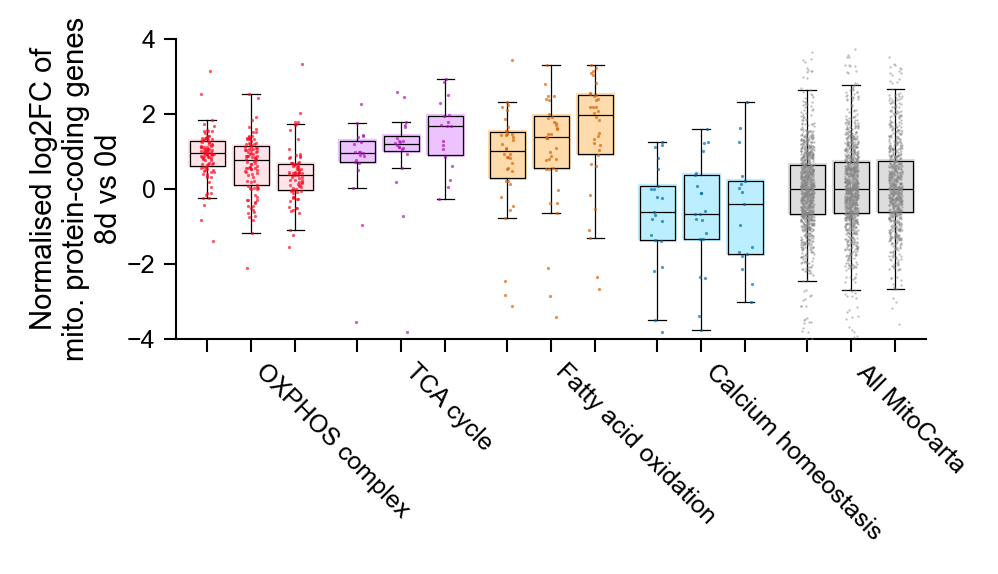

<Figure size 640x480 with 0 Axes>

In [ ]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

height_ratios = [1]*nrow
width_ratios = [0.5*len(Genesets)]*ncol

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


ax = fig.add_subplot(grid[0,0])

box = ax.boxplot(plot_data, positions=x_pos, 
                 widths=0.8,
                 medianprops={'linewidth':0.3, 'color':'k'},
                 boxprops={'linewidth':0.3, 'color':'k'},
                 whiskerprops={'linewidth':0.3, 'color':'k'},
                 capprops={'linewidth':0.3, 'color':'k'},
                 showfliers=False,
                #  showmeans=True, meanprops={'marker':'D', 'markersize':'1.5', 'markerfacecolor':'k', 'markeredgewidth':0}
                 )
for artist, color in zip(box['boxes'], box_color_list):
    patch = mpl.patches.PathPatch(artist.get_path(), color=color)
    ax.add_artist(patch)

for x, values, c in zip(x_pos, plot_data, sct_color_list):
    s = 0.6
    rasterized = False
    if x > 13: 
        s = 0.3
        rasterized = True
    strip_plot(x=x, y=values, 
               width=0.3, s=s, c=c, lw=0, 
               ax=ax, rasterized=rasterized)


ax.set_xlim(x_pos[0]-0.7, x_pos[-1]+0.7)
ax.set_ylim(-4, 4) # -4,4.55
ax.set_xticklabels([i for GS in Genesets for i in ['',GS,'']], ha='left', rotation=-45)
ax.tick_params(width=0.5, length=3, pad=2)

ax.set_xlabel('')
ax.set_ylabel('Normalised log2FC of\nmito. protein-coding genes\n8d vs 0d', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('OXPHOS-others_logFCz.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [18]:
[len(plot_data[i]) for i in range(len(plot_data))]

[99, 99, 79, 20, 20, 18, 38, 39, 34, 21, 21, 17, 1043, 1045, 758]

In [19]:
from scipy.stats import ks_2samp

# OXPHOS
print(ks_2samp(plot_data[0], plot_data[1])) # R vs P
print(ks_2samp(plot_data[0], plot_data[2]), '\n') # R vs PT

# TCA
print(ks_2samp(plot_data[3], plot_data[4])) # R vs P
print(ks_2samp(plot_data[3], plot_data[5]), '\n') # R vs PT

# FA oxidation
print(ks_2samp(plot_data[6], plot_data[7])) # R vs P
print(ks_2samp(plot_data[6], plot_data[8]), '\n') # R vs PT

# Calcium
print(ks_2samp(plot_data[9], plot_data[10])) # R vs P
print(ks_2samp(plot_data[9], plot_data[11]), '\n') # R vs PT

# All
print(ks_2samp(plot_data[12], plot_data[13])) # R vs P
print(ks_2samp(plot_data[12], plot_data[14]), '\n') # R vs PT

KstestResult(statistic=0.20202020202020202, pvalue=0.03492893502086905)
KstestResult(statistic=0.5045390615010868, pvalue=9.529813038282218e-11) 

KstestResult(statistic=0.4, pvalue=0.08105771161340149)
KstestResult(statistic=0.45555555555555555, pvalue=0.02623848901049859) 

KstestResult(statistic=0.2253711201079622, pvalue=0.220958167411199)
KstestResult(statistic=0.3746130030959752, pvalue=0.008914294267919384) 

KstestResult(statistic=0.09523809523809523, pvalue=0.9999961038154768)
KstestResult(statistic=0.22128851540616246, pvalue=0.6479291070471711) 

KstestResult(statistic=0.033866239729892146, pvalue=0.5711432187740993)
KstestResult(statistic=0.05341426825905585, pvalue=0.15594937713113136) 

